c:\Users\gdeng\miniconda3\envs\savorclinic2\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


172.26800000000017


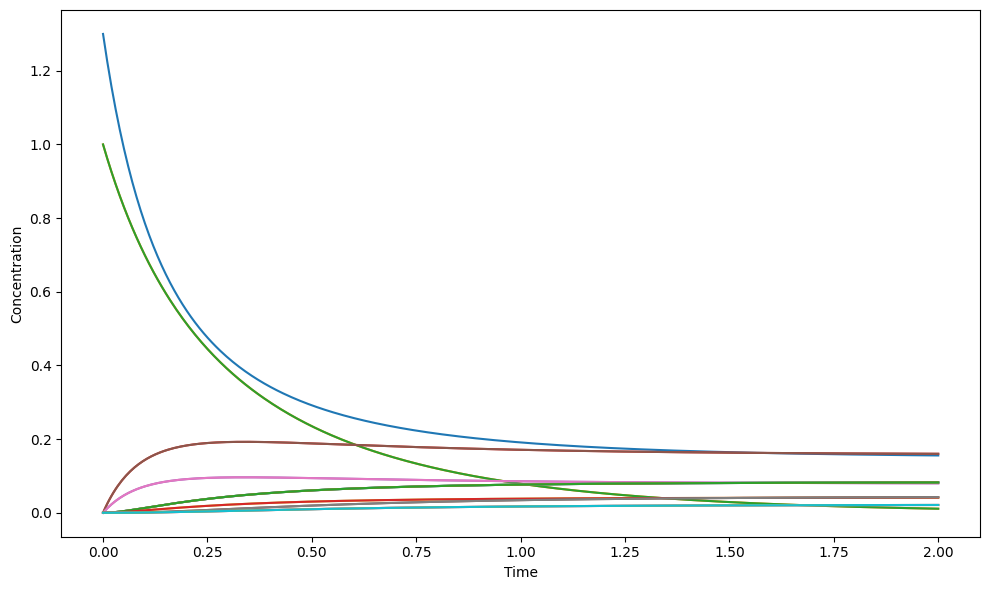

In [1]:
# testing esterification
from glyze import FattyAcid, Glyceride, ChemReactSim

fa7 = FattyAcid(length=7)
fa8 = FattyAcid(length=8)
fa9 = FattyAcid(length=9)
fa10 = FattyAcid(length=10)
fa11 = FattyAcid(length=11)
fa12 = FattyAcid(length=12)
fm7 = fa7.molar_mass
fm10 = fa10.molar_mass
print(fm10)

# sim = ChemReactSim.p_kinetic_esterification(list_of_fa=[fa7, fa8, fa9, fa10, fa11, fa12], initial_conc = [110, 7.5, 22.4, 29.5, 21.2, 13.7, 5.8], chem_flag=True)
# sim = ChemReactSim.p_kinetic_esterification(list_of_fa=[fatty_acid1, fatty_acid2, fatty_acid3, fatty_acid4, fatty_acid5, fatty_acid6], initial_conc = [1,1,1,1,1,1,1], chem_flag=True)
# sim.overall_order = 2.
sim = ChemReactSim.p_kinetic_esterification(list_of_fa=[fa8, fa10], initial_conc = [1.3, 1, 1], chem_flag=True)
sol = sim.solve(t_span=(0.0, 2))
# y_t2 = sol.sol(2.0)  # returns full state vector at t=2
# print(y_t2)
sim.plot(sol=sol)